### 로이터 뉴스 분류

In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [5]:
# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)

# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


In [7]:
# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
from keras import models
from keras import layers

In [11]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu' ))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
x_val = x_train[ :1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Epoch 1/20
16/16 [==============================] - 0s 22ms/step - loss: 2.6624 - accuracy: 0.5299 - val_loss: 1.7754 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4279 - accuracy: 0.7088 - val_loss: 1.3212 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0350 - accuracy: 0.7848 - val_loss: 1.1297 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8118 - accuracy: 0.8330 - val_loss: 1.0354 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6454 - accuracy: 0.8639 - val_loss: 0.9908 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5159 - accuracy: 0.8938 - val_loss: 0.9237 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4146 - accuracy: 0.9171 - val_loss: 0.9012 - val_accuracy: 0.8200
Epoch 8/20
16

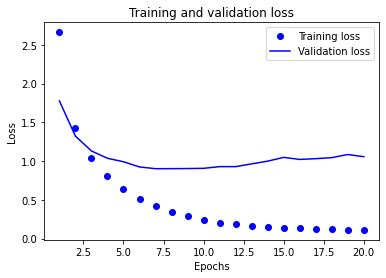

In [13]:
# 학습 진행
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

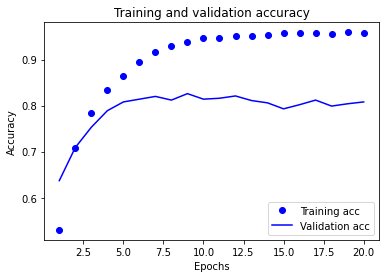

In [14]:
plt.clf()   # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
# 테스트 데이터로 예측 수행
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.2120 - accuracy: 0.7845


[1.2119626998901367, 0.7845057845115662]

In [16]:
### 정수 레이블을 사용할 때, 
y_train = np.array(train_labels)
y_test = np.array(test_labels)

print(y_train.shape)

(8982,)


In [17]:
model.compile(optimizer='rmsprop', 
              loss = 'sparse_categorical_crossentropy', # binary_crossentropy, categoriacial_crossentropy, 
              metrics=['acc'])

In [18]:
x_val = x_train[ :1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]